In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <font color='red'>**Data loading**</font>

In [ ]:
path = '../imgs_results/binary/embcVariation/vgg16Validation/betas/'+experiment+'/'+'onlinePreds.csv'
df = pd.read_csv(path, header=None)
df.columns = ['Info', 'Frame', 'Prob_ade', 'Prob_hyp']
df.head()

## For classifier

In [2]:
path1 = '../models/classifier/binary/vgg16/fold1/vgg16onlinePredsRealNBIValid.csv'
vgg_df = pd.read_csv(path1, header=None)
vgg_df.columns = ['Info', 'Frame', 'Prob_ade', 'Prob_hyp']


path2 = '../models/classifier/binary/EfficientNetV2B0/EfficientNetV2B0onlinePredsRealNBIValid.csv'
effnet_df = pd.read_csv(path2, header=None)
effnet_df.columns = ['Info', 'Frame', 'Prob_ade', 'Prob_hyp']

In [3]:
def custom_df(df):
    gt, index, pred, label = [], [], [], [] 
    for i in range(len(df)):
        gen_inf = df.iloc[i]['Info']
        clase = gen_inf.split('_')[0]
        num_video = gen_inf.split('_')[-1]
        ade_p = df.iloc[i]['Prob_ade']
        hyp_p = df.iloc[i]['Prob_hyp']

        if clase == 'adenoma':
            gt.append(0)
            label.append('adenoma')
            curr_cls = 'ade'
            name = curr_cls + '_v' + num_video
            index.append(name)
        else:
            gt.append(1)
            label.append('hyperplastic')
            curr_cls = 'hyp'
            name = curr_cls + '_v' + num_video
            index.append(name)

        if ade_p > hyp_p:
            pred.append(0)
        else:
            pred.append(1)

    df['GT'] = gt
    df['Pred'] = pred
    df['label'] = label
    df['Short_info'] = index
    df.head()
    
    return df

In [4]:
vgg_df = custom_df(vgg_df)
effnet_df = custom_df(effnet_df)

In [5]:
vgg_df.groupby('Pred').count()

,Info,Frame,Prob_ade,Prob_hyp,GT,label,Short_info
Pred,,,,,,,
0,3659,3659,3659,3659,3659,3659,3659
1,2390,2390,2390,2390,2390,2390,2390


In [6]:
effnet_df.groupby('Pred').count()

,Info,Frame,Prob_ade,Prob_hyp,GT,label,Short_info
Pred,,,,,,,
0,4466,4466,4466,4466,4466,4466,4466
1,1583,1583,1583,1583,1583,1583,1583


# <font color='red'>**Explanation**</font>
## Validation videos

In [7]:
val_path = '../data/csv_files/adeVshyp/NBI/valNBI.csv'
val_df = pd.read_csv(val_path, header=None)
val_df.columns = ['path', 'label']
val_df.groupby(['label']).count()

,path
label,
adenoma,3669
hiperplastic,1446


In [11]:
videos = []
for i in range(len(val_df)):
    path = val_df.iloc[i]['path']
    info = path.split('/')[-1]
    clase = info.split('_')[0]
    video = info.split('_')[3]
    to_save = clase + '_NBI_video_' + video
    videos.append(to_save)
    
videos_set = set(videos)
videos = list(videos_set)
print("unique videos for valid set:")
print(videos)

unique videos for valid set:
['hiperplastic_NBI_video_12', 'adenoma_NBI_video_24', 'adenoma_NBI_video_26', 'hiperplastic_NBI_video_14', 'hiperplastic_NBI_video_16', 'adenoma_NBI_video_31', 'adenoma_NBI_video_16', 'adenoma_NBI_video_37', 'adenoma_NBI_video_17', 'hiperplastic_NBI_video_2', 'adenoma_NBI_video_40']


### Well predicted frames proportion

In [ ]:
index, adenoma_prop, hyperplastic_prop = [], [], [] 
for video in videos:
    clase = video.split('_')[0]
    num_video = video.split('_')[-1]
    single_df = df[df['Info'].str.contains(video)]
    cant = len(single_df)
    
    if clase == 'adenoma':
        #making indx
        curr_cls = 'ade'
        name = curr_cls + '_v' + num_video
        index.append(name)
        
        ade_pred = single_df[single_df['Pred']==0]
        pred_as_ade = round(len(ade_pred)/cant, 2)
        adenoma_prop.append(pred_as_ade)
        pred_as_hyp = round(1-pred_as_ade,2)
        hyperplastic_prop.append(pred_as_hyp)        
    else:
        #making indx
        curr_cls = 'hyp'
        name = curr_cls + '_v' + num_video
        index.append(name)
        
        hyp_pred = single_df[single_df['Pred']==1]
        pred_as_hyp = round(len(hyp_pred)/cant, 2)
        hyperplastic_prop.append(pred_as_hyp)
        pred_as_ade = round(1-pred_as_hyp,2)
        adenoma_prop.append(pred_as_ade)

In [12]:
def pred_proportion(videos, df):
    index, adenoma_prop, hyperplastic_prop = [], [], [] 
    for video in videos:
        clase = video.split('_')[0]
        num_video = video.split('_')[-1]
        single_df = df[df['Info'].str.contains(video)]
        cant = len(single_df)

        if clase == 'adenoma':
            #making indx
            curr_cls = 'ade'
            name = curr_cls + '_v' + num_video
            index.append(name)

            ade_pred = single_df[single_df['Pred']==0]
            pred_as_ade = round(len(ade_pred)/cant, 2)
            adenoma_prop.append(pred_as_ade)
            pred_as_hyp = round(1-pred_as_ade,2)
            hyperplastic_prop.append(pred_as_hyp)        
        else:
            #making indx
            curr_cls = 'hyp'
            name = curr_cls + '_v' + num_video
            index.append(name)

            hyp_pred = single_df[single_df['Pred']==1]
            pred_as_hyp = round(len(hyp_pred)/cant, 2)
            hyperplastic_prop.append(pred_as_hyp)
            pred_as_ade = round(1-pred_as_hyp,2)
            adenoma_prop.append(pred_as_ade)  
    
    return index, adenoma_prop, hyperplastic_prop

In [13]:
vgg_idx, vgg_ade_prop, vgg_hyp_prop = pred_proportion(videos, vgg_df)
effnet_idx, effnet_ade_prop, effnet_hyp_prop = pred_proportion(videos, effnet_df)

In [14]:
vgg_idx

['hyp_v12',
 'ade_v24',
 'ade_v26',
 'hyp_v14',
 'hyp_v16',
 'ade_v31',
 'ade_v16',
 'ade_v37',
 'ade_v17',
 'hyp_v2',
 'ade_v40']

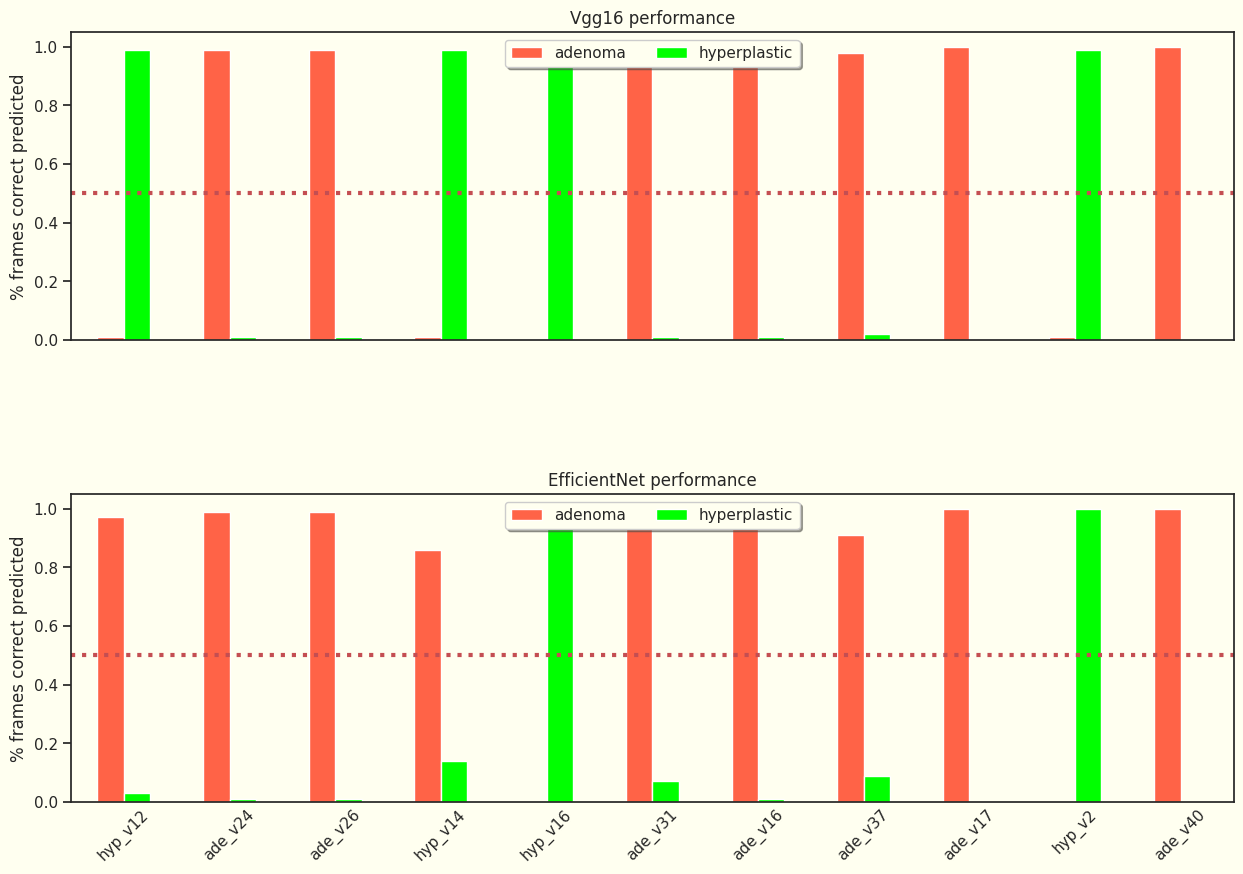

In [72]:
index = vgg_idx
df_test = pd.DataFrame({'adenoma': vgg_ade_prop, 'hyperplastic': vgg_hyp_prop}, index=index)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,10), sharex=True, gridspec_kw={'hspace': 0.5})

ax = df_test.plot.bar(rot=45, color={"adenoma": "tomato", "hyperplastic": "lime"}, ax=axs[0])
ax.set_title("Vgg16 performance")
ax.axhline(y=0.5, color='r', linestyle='dotted', linewidth=3)
ax.set_ylabel("% frames correct predicted")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1), fancybox=True, shadow=True, ncol=2)
ax.tick_params(axis='x', which='both',length=0) # Remove x-axis ticks and labels

# Add second subplot
index = effnet_idx
df_test = pd.DataFrame({'adenoma': effnet_ade_prop, 'hyperplastic': effnet_hyp_prop}, index=index)
# Add second subplot
ax = df_test.plot.bar(rot=45, color={"adenoma": "tomato", "hyperplastic": "lime"}, ax=axs[1])
ax.set_title("EfficientNet performance")
ax.axhline(y=0.5, color='r', linestyle='dotted', linewidth=3)
ax.set_ylabel("% frames correct predicted")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1), fancybox=True, shadow=True, ncol=2)
ax.tick_params(axis='x', which='both',length=0) # Remove x-axis ticks and labels

plt.show()

### Boxplot probabilities
#### By frames

<Figure size 1000x500 with 0 Axes>

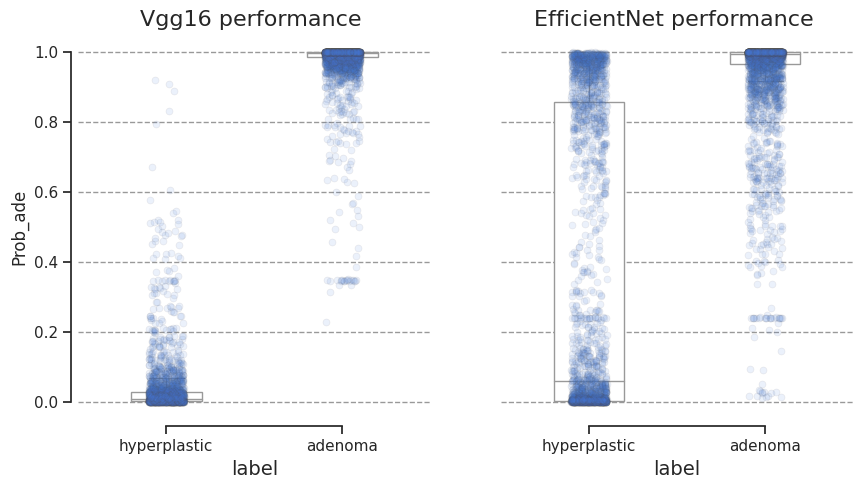

In [70]:
# Set style
set_color = '#4379d9'

sns.set(style="ticks",
        rc={"figure.figsize": (10, 5),
            "figure.facecolor": "white",
            "axes.facecolor": "white",
            "grid.linestyle": "--",
            "grid.color": "gray",
            "grid.alpha": 0.8})

# Create subplots
fig, axs = plt.subplots(ncols=2, sharey=True)

# Box plot 1
sns.boxplot(data=vgg_df,  
            x="label",
            y="Prob_ade",
            width=0.4,
            color='white',
            linewidth=1,
            showfliers=False,
            ax=axs[0])

# Strip plot 1
sns.stripplot(data=vgg_df,
              x="label",
              y="Prob_ade",
              color=set_color,
              linewidth=0.5,
              alpha=0.1,
              ax=axs[0])

# Set title and x-label for subplot 1
axs[0].set_title("Vgg16 performance ", fontsize=16)
axs[0].set_xlabel("label", fontsize=14)

# Box plot 2
sns.boxplot(data=effnet_df,  
            x="label",
            y="Prob_ade",
            width=0.4,
            color='white',
            linewidth=1,
            showfliers=False,
            ax=axs[1])

# Strip plot 2
sns.stripplot(data=effnet_df,
              x="label",
              y="Prob_ade",
              color=set_color,
              linewidth=0.5,
              alpha=0.1,
              ax=axs[1])

# Set title and x-label for subplot 2
axs[1].set_title("EfficientNet performance ", fontsize=16)
axs[1].set_xlabel("label", fontsize=14)

# Remove y-axis label for subplot 2
axs[1].set_ylabel("")
axs[1].tick_params(axis='y', length=0)

# Remove spines
sns.despine(offset=5, trim=True)

for ax in axs.flat:
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

## Hide the left y-axis line in the second plot
axs[1].spines['left'].set_visible(False)

#save figure
plt.savefig('classifiersPerform.pdf')

# Show the figure
plt.show()

#### By videos <font color='red'>**(Video probabilities)**</font>

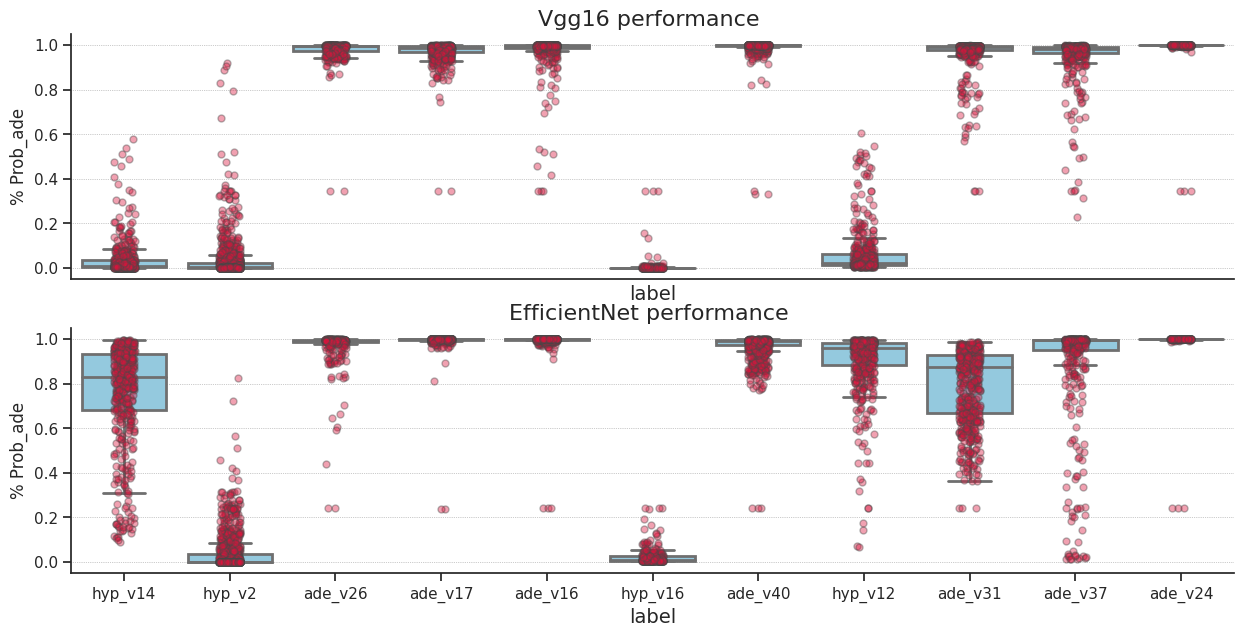

In [96]:
#sns.set(style="ticks",# The 'ticks' style
#        rc={"figure.figsize": (15, 9),      # width = 6, height = 9
#            "figure.facecolor": "white",  # Figure colour
#            "axes.facecolor": "white"})  # Axes colour

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,7), sharex=True, gridspec_kw={'hspace': 0.2})

# Box plot1
sns.boxplot(data = vgg_df,
            x = "Short_info",       # x axis column from data
            y = "Prob_ade",       # y axis column from data
            width = 0.8,        # The width of the boxes
            color = "skyblue",  # Box colour
            linewidth = 2,      # Thickness of the box lines
            showfliers = False,
            ax=axs[0])  # Sop showing the fliers
# Strip plot
sns.stripplot(data = vgg_df,
              x = "Short_info",      # x axis column from data
              y = "Prob_ade",      # y axis column from data
              color = "crimson", # Colours the dots
              linewidth = 1,     # Dot outline width
              alpha = 0.4,
              ax=axs[0])       # Makes them transparent

# Set title and x-label for subplot 1
axs[0].set_title("Vgg16 performance ", fontsize=16)
axs[0].set_xlabel("label", fontsize=14)
axs[0].set_ylabel("% Prob_ade")
axs[0].tick_params(axis='x', which='both',length=0) # Remove x-axis ticks and labels

# Box plot2
sns.boxplot(data = effnet_df,
            x = "Short_info",       # x axis column from data
            y = "Prob_ade",       # y axis column from data
            width = 0.8,        # The width of the boxes
            color = "skyblue",  # Box colour
            linewidth = 2,      # Thickness of the box lines
            showfliers = False,
            ax=axs[1])  # Sop showing the fliers
# Strip plot
sns.stripplot(data = effnet_df,
              x = "Short_info",      # x axis column from data
              y = "Prob_ade",      # y axis column from data
              color = "crimson", # Colours the dots
              linewidth = 1,     # Dot outline width
              alpha = 0.4,
              ax=axs[1])       # Makes them transparent

# Set title and x-label for subplot 2
axs[1].set_title("EfficientNet performance ", fontsize=16)
axs[1].set_xlabel("label", fontsize=14)
axs[1].set_ylabel("% Prob_ade")

# Remove vertical gridlines
for ax in axs:
    ax.grid(axis='y', color='gray', linestyle=':', linewidth=0.5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
plt.show()

### AUC analysis by video

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
videos

In [ ]:
probs = []
y_true = []
for video in videos:
    clase = video.split('_')[0]
    num_video = video.split('_')[-1]
    if clase == 'adenoma':
        y_true.append(0)
    else:
        y_true.append(1)
    
    to_check = clase + '_NBI_video_' + num_video
    curr_df = df[df['Info'].str.contains(to_check)]
    hyp_prob_mean = curr_df['Prob_hyp'].mean()
    probs.append(hyp_prob_mean)

In [ ]:
roc_auc_score(y_true,probs)

In [ ]:
y_true

In [ ]:
probs